In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm

In [99]:
class MyRandom():
    
    def __init__(self,seed=15,method='simple'):
        
        self.r = seed
        self.method = method
        
        if method=='simple':
            self.a = 57
            self.c = 1
            self.M = 265
        elif method == 'drand48':
            self.a = int('5DEECE66D',16)
            self.c = int('B',16)
            self.M = 2**48
        else:
            print('Generador no existente')
            
    def GetNumber(self):
        
        r = (self.a*self.r + self.c)%self.M
        self.r = r
        
        return r/float(self.M)
    
    def Random(self, size=None):
        
        if size == None:
            return self.GetNumber()
        else:
            sample = np.zeros(size)
            for i in range(size):
                sample[i] = self.GetNumber()
            return sample
        
    def Momentos(self, k=1, N = int(1e3)):
        sample = self.Random(N)
        return np.sqrt(N)*( np.abs( np.mean(sample**k) - 1/(1+k) ) )
        
    

In [100]:
rand1 = MyRandom(seed=150)
rand2 = MyRandom(seed=50,method='drand48')

In [101]:
#for i in range(10):
#    print(rand1.GetNumber(),rand2.GetNumber())

In [102]:
rand1.Random(10)

array([0.26792453, 0.2754717 , 0.70566038, 0.22641509, 0.90943396,
       0.84150943, 0.96981132, 0.28301887, 0.13584906, 0.74716981])

In [103]:
np.random.rand()

0.5731678905012657

In [104]:
np.random.uniform(0,2,size=(3,4))

array([[1.56993524, 0.43977249, 0.49449744, 0.05316553],
       [1.78641291, 1.52742867, 1.22648716, 1.19456541],
       [0.03205868, 0.57613903, 0.37623652, 0.33139048]])

In [105]:
N = 5000
sample1 = rand1.Random(N)
sample2 = rand2.Random(N)

In [106]:
indices = np.arange(N)
Even = (indices%2) == 0

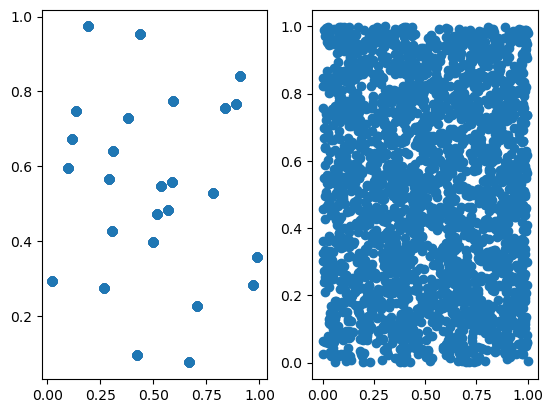

In [107]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(sample1[Even], sample1[~Even])
ax2.scatter(sample2[Even],sample2[~Even])

In [108]:
promedio = rand1.Momentos(k=1, N=int(1e5))
promedio

6.492931689336632

In [109]:
promedio = rand2.Momentos(k=1, N=int(1e5))
promedio

0.20259202773362017

In [112]:
Np = 5
Points = np.logspace(2, 6, Np)
Points

array([1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

In [125]:
Nk = 10
Moments1 = np.zeros((Nk,Np))
Moments2 = np.zeros((Nk,Np))
samples1 = np.zeros_like(Points)
samples2 = np.zeros_like(Points)

for k in tqdm(range(Nk)):
    
    for i in range(Np):
        
        samples1[i] = rand1.Momentos(k+1,N=int(Points[i]))
        samples2[i] = rand2.Momentos(k+1,N=int(Points[i]))
        
        Moments1[k,i] = samples1[i]
        Moments2[k,i] = samples2[i]

100%|███████████████████████████████████████████| 10/10 [00:10<00:00,  1.07s/it]


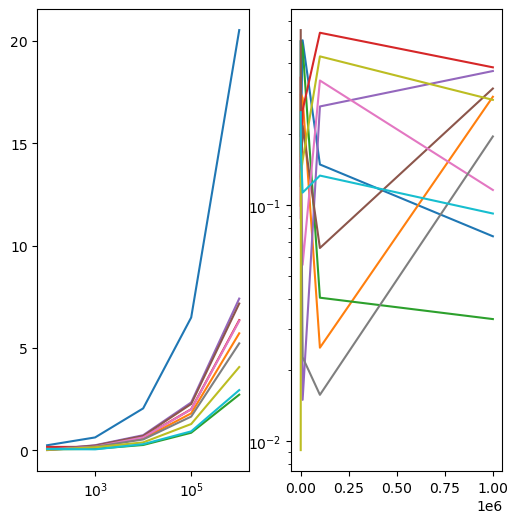

In [126]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)


for i in range(Nk):
    ax1.plot(Points,Moments1[i,:])
    ax2.plot(Points,Moments2[i,:])
    
ax1.set_xscale('log')
ax2.set_yscale('log')